In [26]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'1.13.1+cu117'

In [27]:
# create known data
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

## Spliting training and Testing data set

In [28]:
# split to training and testing set
train_split = int(0.8 * len(X)) # 80% of data used for training set, 20% for testing 
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [29]:
def plot_predictions(train_data=X_train, train_labels=y_train, 
                    test_data=X_test, test_labels=y_test, predictions=None):
    """
    Plots training data, test data and compares predictions.
    """
    plt.figure(figsize=(10, 7))

    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

    # Plot test data in green
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

    if predictions is not None:
        # Plot the predictions in red (predictions were made on the test data)
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    # Show the legend
    plt.legend(prop={"size": 14});

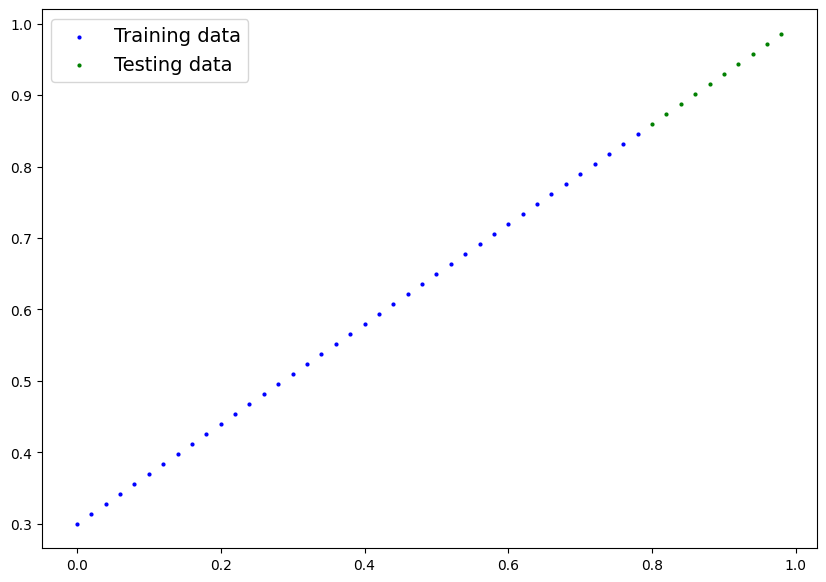

In [30]:
plot_predictions();

## Build model

With 2 main algorithms:
1. Gradient descent - https://www.youtube.com/watch?v=IHZwWFHWa-w
2. Backpropagation



In [31]:
from torch import nn

# Create linear regression
class LinearRegressionModel(nn.Module): # <- class LinearRegressionModel is the subclass of nn.Module
    def __init__(self) -> None:
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True) # random weight for before finding abs minima
        self.bias = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True) # random bias for before finding abs minima
    
    # overwrite computation model of nn.Module
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias # linear regression formula y=mx+b

In [32]:
torch.manual_seed(12)

model_0 = LinearRegressionModel()

# Check the nn.Parameter(s) within the nn.Module subclass we created
list(model_0.parameters())

[Parameter containing:
 tensor([-0.2138], requires_grad=True),
 Parameter containing:
 tensor([-1.3780], requires_grad=True)]

In [33]:
# List named parameters 
model_0.state_dict()

OrderedDict([('weights', tensor([-0.2138])), ('bias', tensor([-1.3780]))])

Prediction with inference_mode() or no_grad()

In [34]:
# Make predictions with model
with torch.inference_mode(): 
    y_preds = model_0(X_test)

# Note: in older PyTorch code you might also see torch.no_grad()
# with torch.no_grad():
#   y_preds = model_0(X_test)

In [35]:
# Check the predictions
print(f"Number of testing samples: {len(X_test)}") 
print(f"Number of predictions made: {len(y_preds)}")
print(f"Predicted values:\n{y_preds}")

Number of testing samples: 10
Number of predictions made: 10
Predicted values:
tensor([[-1.5490],
        [-1.5533],
        [-1.5576],
        [-1.5618],
        [-1.5661],
        [-1.5704],
        [-1.5747],
        [-1.5789],
        [-1.5832],
        [-1.5875]])


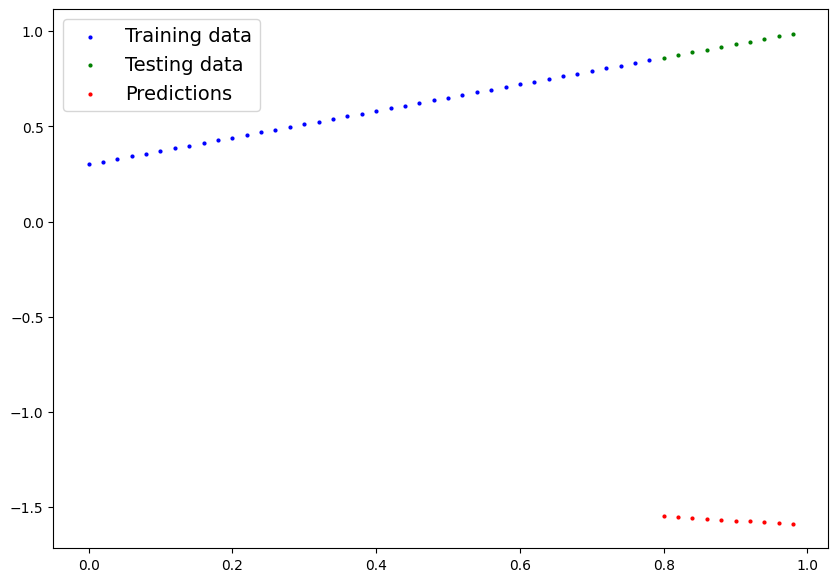

In [36]:
plot_predictions(predictions=y_preds)

In [37]:
y_test - y_preds


tensor([[2.4090],
        [2.4273],
        [2.4456],
        [2.4638],
        [2.4821],
        [2.5004],
        [2.5187],
        [2.5369],
        [2.5552],
        [2.5735]])

In [38]:
# Create loss function

loss_fn = nn.L1Loss()

# Create the optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), # parameter of target model
lr=0.01) # learning rate

Training data

0. Loop through the data
1. Forward pass
2. Calculate the loss
3. Optimizer zero grad
4. Perform backpropagation on the loss with respect parameter of model
5. Step the optimizer(perform gradient descent)

In [44]:
epoches = 10

for epoch in range(epoches):
    # Set to calculation mode
    model_0.train()

    # 1. Forward pass
    y_pred = model_0(X_train)

    # 2. Calculate the loss
    loss = loss_fn(y_pred, y_train)

    # # 3. Optimizer zero grad
    optimizer.zero_grad()

    # # 4. Perform backpropagation
    loss.backward()

    # # 5. Step the optimizer
    optimizer.step()
